# Handwritten style transfer using CycleGAN

This notebook demonstrates an interesting application of cycleGAN -- handwritten style transfer. We will use the cycleGAN model to transfer the style of one Chinese characters to another.

In [1]:
# set the environment
%load_ext autoreload
%autoreload 2
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
print(device)
print(dtype)

cuda
<class 'torch.cuda.FloatTensor'>


In [2]:
# load the training data

from torch.utils.data import DataLoader
from torchvision import transforms
from DataReader import MyDataset

transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = 'style'
Dataset_X = MyDataset(path= f'./data/{dataset}/train/songti/', num=1000, transform=transform, type='.png')
Dataset_Y = MyDataset(path= f'./data/{dataset}/train/wxz/', num=1000, transform=transform)

train_X = DataLoader(Dataset_X, batch_size=1, shuffle=True)
train_Y = DataLoader(Dataset_Y, batch_size=1, shuffle=True) 
train_X = [1 - x for x in train_X]
train_Y = [1 - y for y in train_Y]

In [46]:
# set the model
from Gen import Generator
from Dis import Discriminator
from torch.optim import Adam

Gxy = Generator().type(dtype)
Gxy.load_state_dict(torch.load('model_han/Gxy.pth'))
Oxy = Adam(Gxy.parameters(), lr=2e-4, betas=(0.5, 0.999))

Gyx = Generator().type(dtype)
Gyx.load_state_dict(torch.load('model_han/Gyx.pth'))
Oyx = Adam(Gyx.parameters(), lr=2e-4, betas=(0.5, 0.999))

Dx = Discriminator().type(dtype)
Dx.load_state_dict(torch.load('model_han/Dx.pth'))
Ox = Adam(Dx.parameters(), lr=2e-4, betas=(0.5, 0.999))

Dy = Discriminator().type(dtype)
Dy.load_state_dict(torch.load('model_han/Dy.pth'))
Oy = Adam(Dy.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [4]:
# loss functions

import torch.nn.functional as F

def loss_D_ls(scores_real, scores_fake):
    return torch.mean((scores_real - 1) ** 2) + torch.mean(scores_fake ** 2)

def loss_D_ce(scores_real, scores_fake):
    return F.binary_cross_entropy_with_logits(scores_real, torch.ones_like(scores_real)) + \
           F.binary_cross_entropy_with_logits(scores_fake, torch.zeros_like(scores_fake))

def loss_G_ls(scores_fake):
    return torch.mean((scores_fake - 1) ** 2)

def loss_G_ce(scores_fake):
    return F.binary_cross_entropy_with_logits(scores_fake, torch.ones_like(scores_fake))

def loss_C(real, fake):
    return torch.mean(torch.abs(fake - real))

epoch: 0 | step: 0 | loss_Dx: 0.0024 | loss_Dy: 0.2467 | loss_Gxy: 1.7062 | loss_Gyx: 5.3350 | loss_cycle: 1.1190


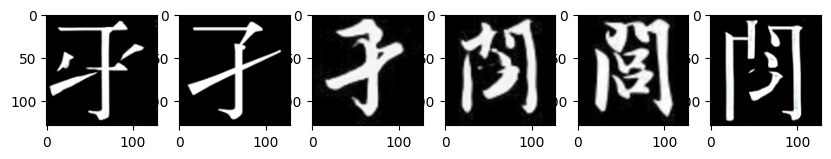

epoch: 0 | step: 300 | loss_Dx: 0.1868 | loss_Dy: 0.6052 | loss_Gxy: 1.2889 | loss_Gyx: 3.3730 | loss_cycle: 1.5468


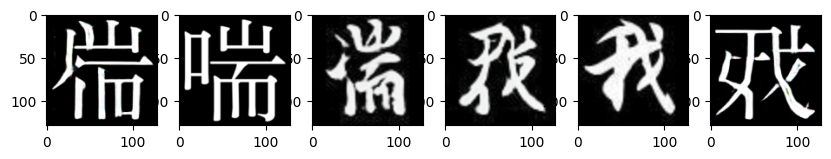

epoch: 0 | step: 600 | loss_Dx: 0.0027 | loss_Dy: 0.1310 | loss_Gxy: 2.3198 | loss_Gyx: 1.6834 | loss_cycle: 1.5966


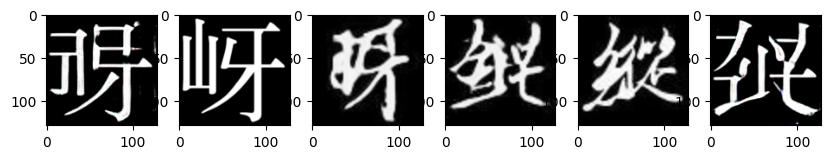

epoch: 0 | step: 900 | loss_Dx: 0.0174 | loss_Dy: 0.0605 | loss_Gxy: 0.5002 | loss_Gyx: 2.7282 | loss_cycle: 1.4561


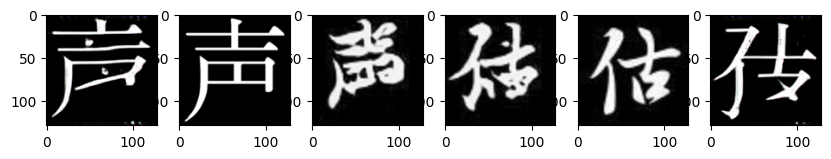

epoch: 1 | step: 0 | loss_Dx: 0.0070 | loss_Dy: 0.0309 | loss_Gxy: 1.7159 | loss_Gyx: 4.3540 | loss_cycle: 1.6734


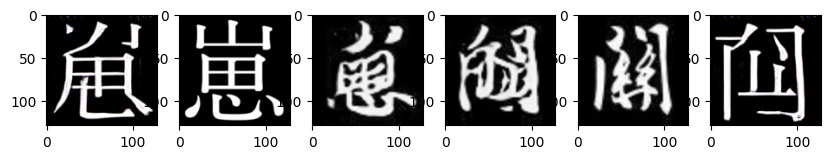

epoch: 1 | step: 300 | loss_Dx: 0.0166 | loss_Dy: 0.0335 | loss_Gxy: 1.8778 | loss_Gyx: 2.6208 | loss_cycle: 1.4486


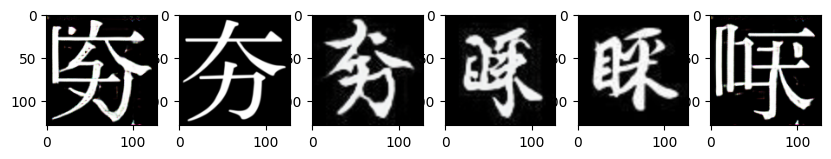

epoch: 1 | step: 600 | loss_Dx: 0.0015 | loss_Dy: 0.0706 | loss_Gxy: 2.8069 | loss_Gyx: 4.2910 | loss_cycle: 1.6104


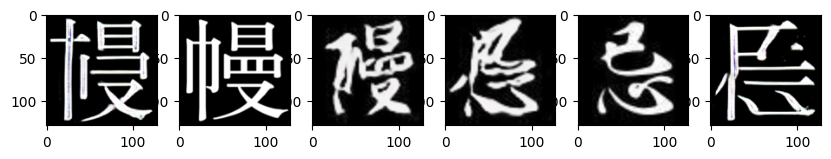

epoch: 1 | step: 900 | loss_Dx: 0.0041 | loss_Dy: 0.0457 | loss_Gxy: 4.1660 | loss_Gyx: 4.8089 | loss_cycle: 1.5624


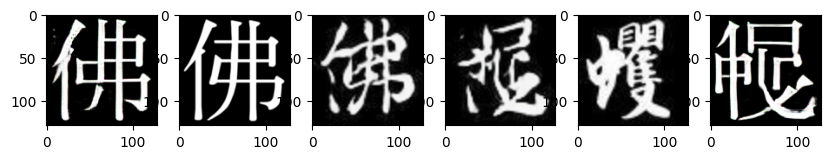

epoch: 2 | step: 0 | loss_Dx: 0.0073 | loss_Dy: 0.1599 | loss_Gxy: 1.5608 | loss_Gyx: 4.5962 | loss_cycle: 1.7115


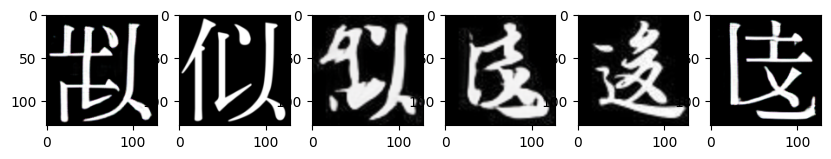

epoch: 2 | step: 300 | loss_Dx: 0.0023 | loss_Dy: 0.0201 | loss_Gxy: 2.2432 | loss_Gyx: 5.5200 | loss_cycle: 1.4243


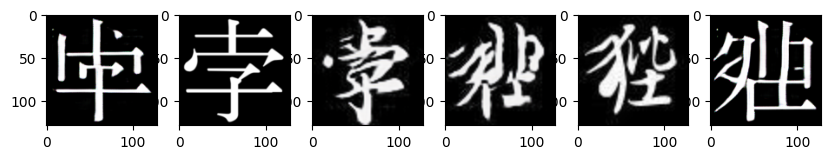

epoch: 2 | step: 600 | loss_Dx: 0.0125 | loss_Dy: 0.1095 | loss_Gxy: 0.4837 | loss_Gyx: 4.0823 | loss_cycle: 1.5014


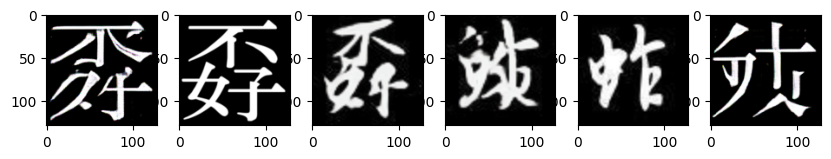

epoch: 2 | step: 900 | loss_Dx: 0.0076 | loss_Dy: 0.1323 | loss_Gxy: 2.0847 | loss_Gyx: 6.8675 | loss_cycle: 1.5559


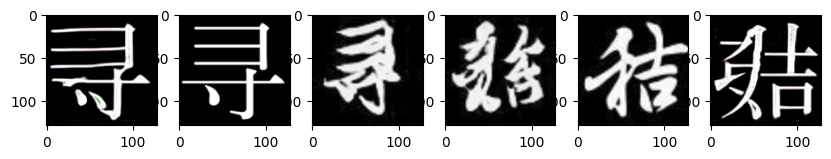

epoch: 3 | step: 0 | loss_Dx: 0.0060 | loss_Dy: 0.3797 | loss_Gxy: 1.1921 | loss_Gyx: 10.2033 | loss_cycle: 1.3409


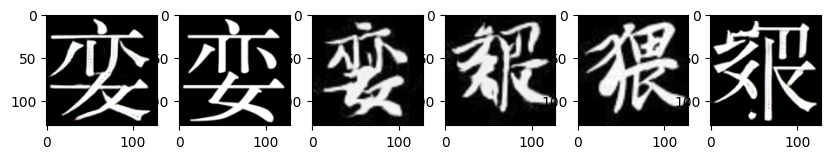

epoch: 3 | step: 300 | loss_Dx: 0.0102 | loss_Dy: 0.0321 | loss_Gxy: 2.6303 | loss_Gyx: 5.4921 | loss_cycle: 1.7585


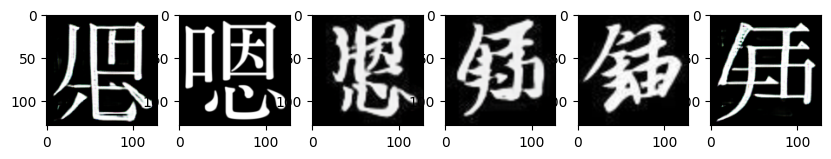

epoch: 3 | step: 600 | loss_Dx: 0.0092 | loss_Dy: 0.3378 | loss_Gxy: 1.0885 | loss_Gyx: 5.6929 | loss_cycle: 1.5600


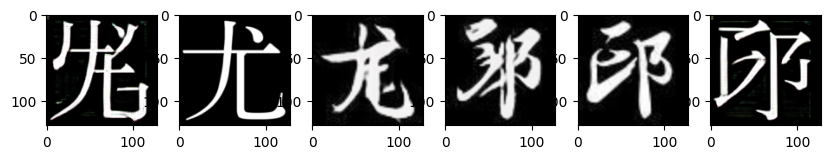

epoch: 3 | step: 900 | loss_Dx: 0.0002 | loss_Dy: 0.6545 | loss_Gxy: 2.3651 | loss_Gyx: 4.2138 | loss_cycle: 1.5388


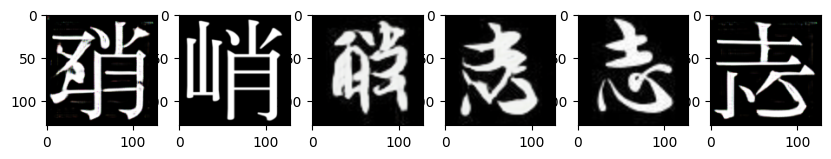

epoch: 4 | step: 0 | loss_Dx: 0.0172 | loss_Dy: 0.1147 | loss_Gxy: 1.2176 | loss_Gyx: 2.3162 | loss_cycle: 1.7019


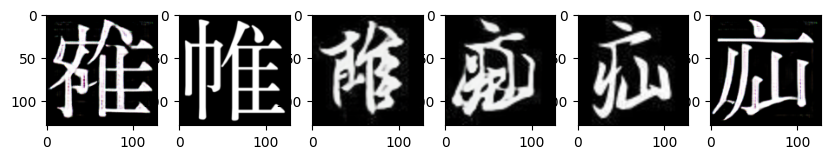

epoch: 4 | step: 300 | loss_Dx: 0.6378 | loss_Dy: 0.1464 | loss_Gxy: 5.5431 | loss_Gyx: 3.3094 | loss_cycle: 2.6228


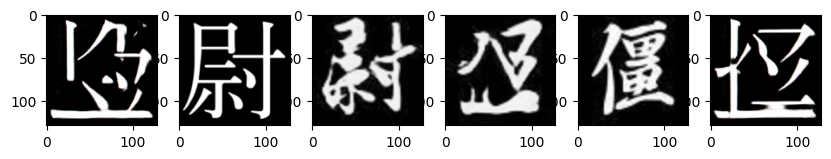

epoch: 4 | step: 600 | loss_Dx: 0.0040 | loss_Dy: 0.0038 | loss_Gxy: 4.9807 | loss_Gyx: 5.4182 | loss_cycle: 3.1722


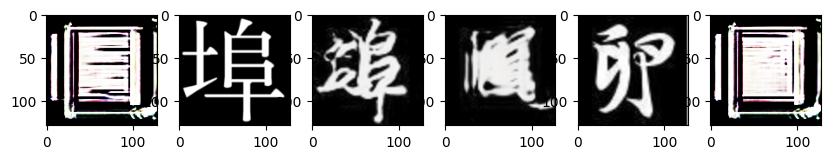

epoch: 4 | step: 900 | loss_Dx: 0.0308 | loss_Dy: 0.0856 | loss_Gxy: 1.6537 | loss_Gyx: 3.8677 | loss_cycle: 3.2783


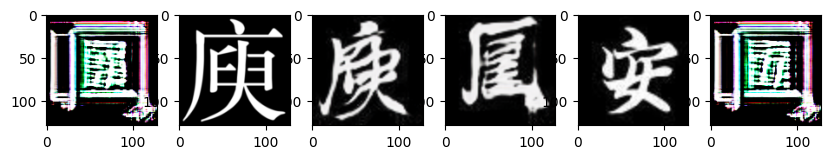

epoch: 5 | step: 0 | loss_Dx: 0.0122 | loss_Dy: 0.5186 | loss_Gxy: 1.1859 | loss_Gyx: 4.4901 | loss_cycle: 3.0753


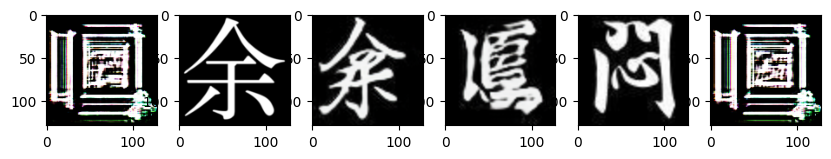

epoch: 5 | step: 300 | loss_Dx: 0.0008 | loss_Dy: 0.2730 | loss_Gxy: 2.0282 | loss_Gyx: 6.5858 | loss_cycle: 2.8861


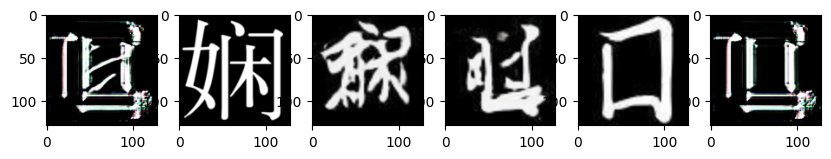

epoch: 5 | step: 600 | loss_Dx: 0.0083 | loss_Dy: 0.2510 | loss_Gxy: 1.7856 | loss_Gyx: 5.4890 | loss_cycle: 2.6215


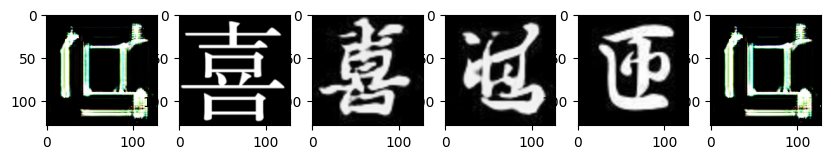

epoch: 5 | step: 900 | loss_Dx: 0.0054 | loss_Dy: 0.1354 | loss_Gxy: 4.2041 | loss_Gyx: 5.6388 | loss_cycle: 2.6077


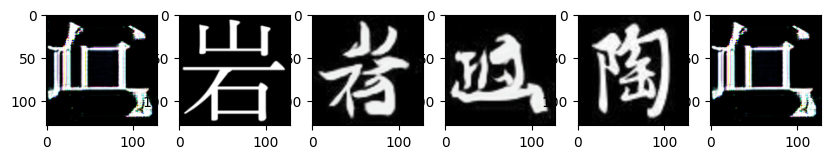

epoch: 6 | step: 0 | loss_Dx: 0.0044 | loss_Dy: 0.0214 | loss_Gxy: 2.0650 | loss_Gyx: 5.8994 | loss_cycle: 2.6554


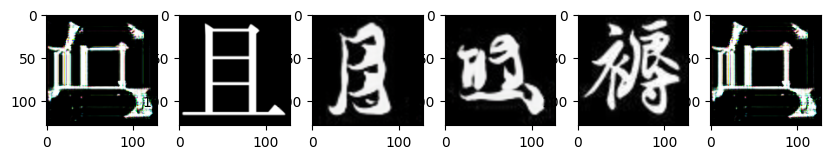

epoch: 6 | step: 300 | loss_Dx: 0.0162 | loss_Dy: 0.5773 | loss_Gxy: 1.2536 | loss_Gyx: 3.8807 | loss_cycle: 2.8734


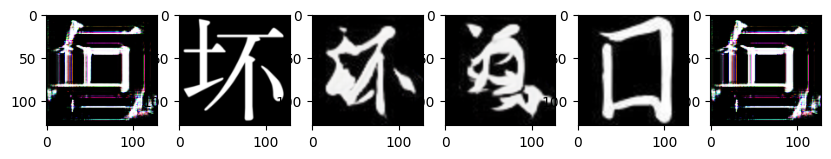

epoch: 6 | step: 600 | loss_Dx: 0.0023 | loss_Dy: 0.0288 | loss_Gxy: 1.7533 | loss_Gyx: 5.0107 | loss_cycle: 2.6543


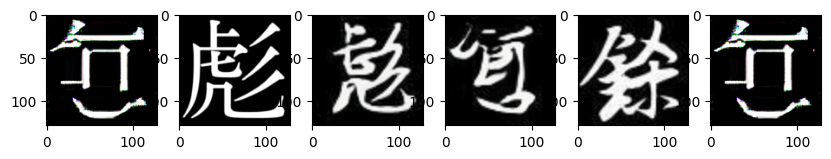

epoch: 6 | step: 900 | loss_Dx: 0.0044 | loss_Dy: 1.1166 | loss_Gxy: 2.7127 | loss_Gyx: 5.3541 | loss_cycle: 2.8284


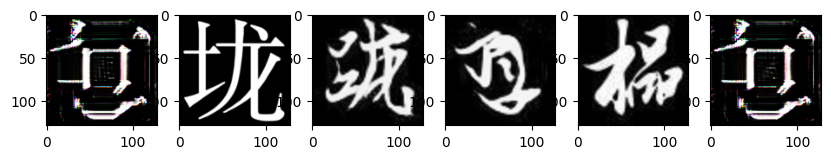

epoch: 7 | step: 0 | loss_Dx: 0.0928 | loss_Dy: 0.0378 | loss_Gxy: 2.3145 | loss_Gyx: 3.9356 | loss_cycle: 3.2686


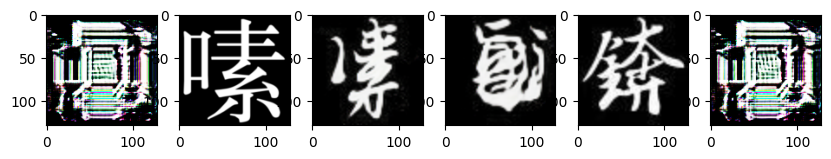

epoch: 7 | step: 300 | loss_Dx: 0.0073 | loss_Dy: 0.0250 | loss_Gxy: 2.7462 | loss_Gyx: 4.5104 | loss_cycle: 3.0521


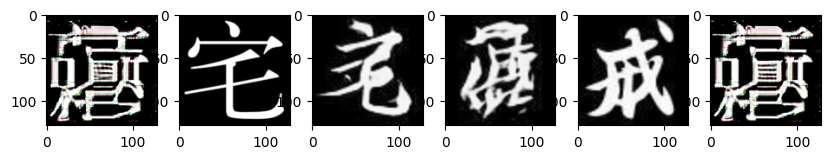

epoch: 7 | step: 600 | loss_Dx: 0.0038 | loss_Dy: 0.1351 | loss_Gxy: 0.7864 | loss_Gyx: 5.5140 | loss_cycle: 2.6322


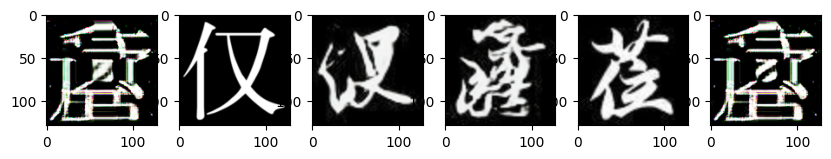

epoch: 7 | step: 900 | loss_Dx: 0.0033 | loss_Dy: 0.0149 | loss_Gxy: 4.3864 | loss_Gyx: 5.7702 | loss_cycle: 2.9561


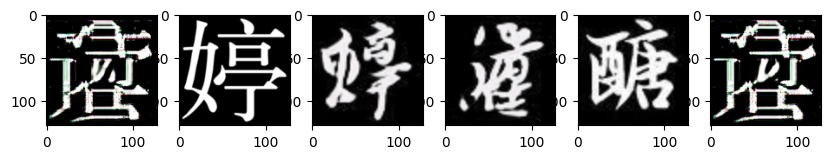

epoch: 8 | step: 0 | loss_Dx: 0.0078 | loss_Dy: 0.2786 | loss_Gxy: 1.9217 | loss_Gyx: 5.5661 | loss_cycle: 2.6643


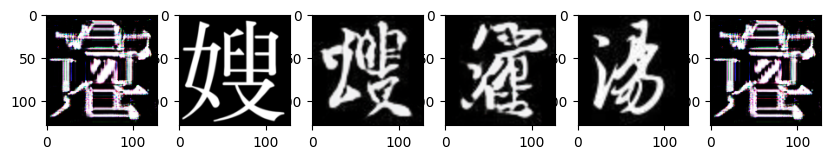

epoch: 8 | step: 300 | loss_Dx: 0.0037 | loss_Dy: 0.0705 | loss_Gxy: 0.8205 | loss_Gyx: 5.3757 | loss_cycle: 2.6202


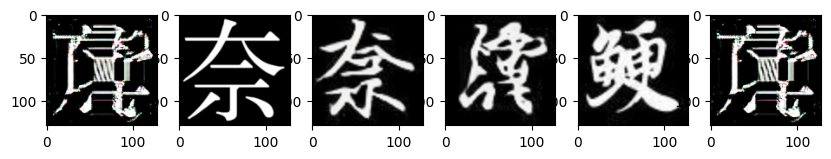

epoch: 8 | step: 600 | loss_Dx: 0.0232 | loss_Dy: 0.2372 | loss_Gxy: 0.8407 | loss_Gyx: 3.0068 | loss_cycle: 2.6058


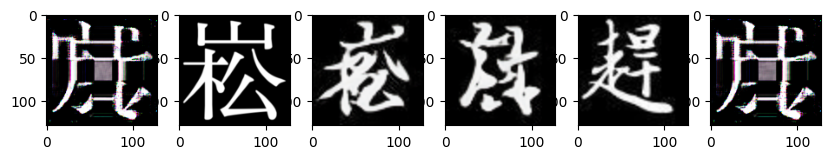

epoch: 8 | step: 900 | loss_Dx: 0.0024 | loss_Dy: 0.1006 | loss_Gxy: 0.7999 | loss_Gyx: 5.8992 | loss_cycle: 2.3210


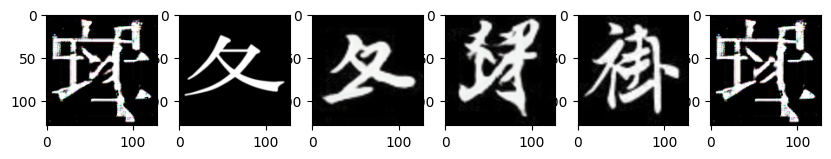

epoch: 9 | step: 0 | loss_Dx: 0.0009 | loss_Dy: 0.0163 | loss_Gxy: 4.4043 | loss_Gyx: 6.2728 | loss_cycle: 2.5898


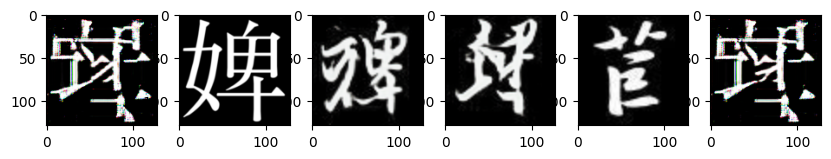

epoch: 9 | step: 300 | loss_Dx: 0.0080 | loss_Dy: 0.2838 | loss_Gxy: 1.2490 | loss_Gyx: 5.5107 | loss_cycle: 2.6407


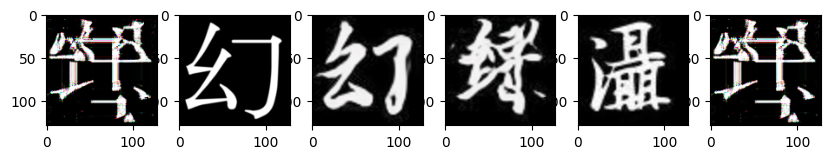

epoch: 9 | step: 600 | loss_Dx: 0.0023 | loss_Dy: 0.0910 | loss_Gxy: 1.7750 | loss_Gyx: 7.1455 | loss_cycle: 2.6038


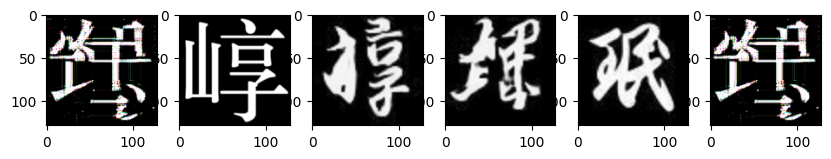

epoch: 9 | step: 900 | loss_Dx: 0.0038 | loss_Dy: 0.1807 | loss_Gxy: 5.5554 | loss_Gyx: 5.2427 | loss_cycle: 2.4533


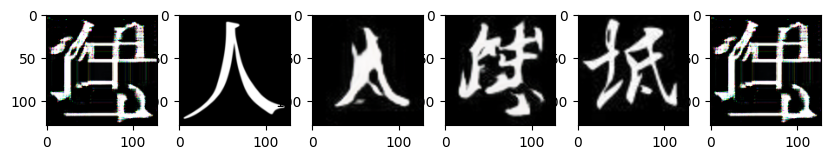

In [40]:
# training
import random
import matplotlib.pyplot as plt

alpha = 10
for epoch in range(10):
    random.shuffle(train_X)
    random.shuffle(train_Y)
    for t, (x, y) in enumerate(zip(train_X, train_Y)):
        real_x = x.type(dtype)
        real_y = y.type(dtype)
        for i in range(1):
            fake_x = Gyx(real_y)
            fake_y = Gxy(real_x)

            # train Dx
            Ox.zero_grad()
            scores_real = Dx(real_x)
            scores_fake = Dx(fake_x)
            loss_Dx = loss_D_ce(scores_real, scores_fake)
            loss_Dx.backward()
            Ox.step()

            # train Dy
            Oy.zero_grad()
            scores_real = Dy(real_y)
            scores_fake = Dy(fake_y)
            loss_Dy = loss_D_ce(scores_real, scores_fake)
            loss_Dy.backward()
            Oy.step()

        for i in range(2):
            fake_x = Gyx(real_y)
            fake_y = Gxy(real_x)
            back_x = Gyx(fake_y)
            back_y = Gxy(fake_x)

            Oxy.zero_grad()
            Oyx.zero_grad()
            loss_cycle = alpha * 0.5 * (loss_C(real_x, back_x) + loss_C(real_y, back_y))
            loss_cycle.backward(retain_graph=True)

            # train Gxy
            scores_fake = Dy(fake_y)
            loss_Gxy = loss_G_ce(scores_fake)
            loss_Gxy.backward()
            Oxy.step()

            # train Gyx
            scores_fake = Dx(fake_x)
            loss_Gyx = loss_G_ce(scores_fake)
            loss_Gyx.backward()
            Oyx.step()

        if t % 300 == 0:
            print('epoch: %d | step: %d | loss_Dx: %.4f | loss_Dy: %.4f | loss_Gxy: %.4f | loss_Gyx: %.4f | loss_cycle: %.4f' % (epoch, t, loss_Dx.item(), loss_Dy.item(), loss_Gxy.item(), loss_Gyx.item(), loss_cycle.item()))
            plt.figure(figsize=(10, 60))
            plt.subplot(1, 6, 1)
            plt.imshow(back_x[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 2)
            plt.imshow(real_x[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 3)
            plt.imshow(fake_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 4)
            plt.imshow(back_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 5)
            plt.imshow(real_y[0].detach().cpu().permute(1, 2, 0))
            plt.subplot(1, 6, 6)
            plt.imshow(fake_x[0].detach().cpu().permute(1, 2, 0))
            plt.show()

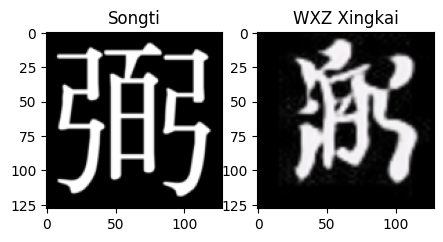

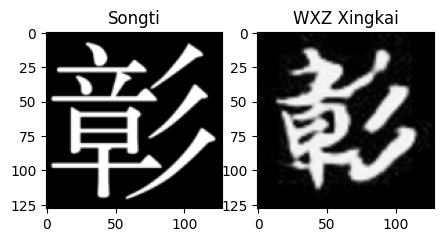

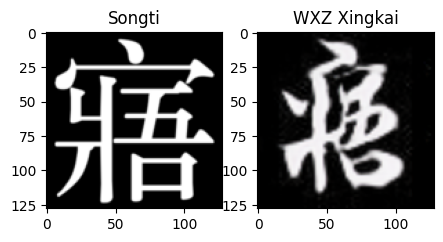

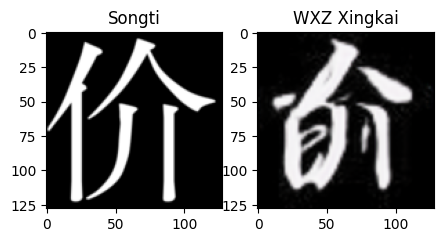

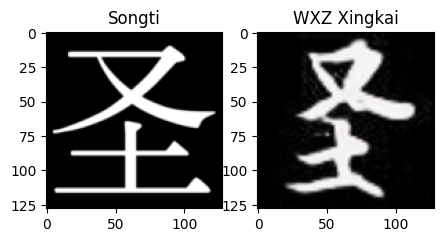

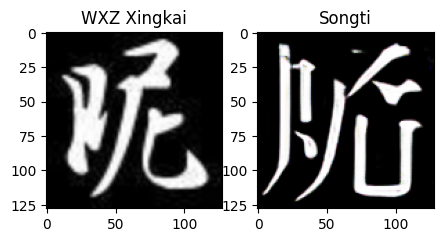

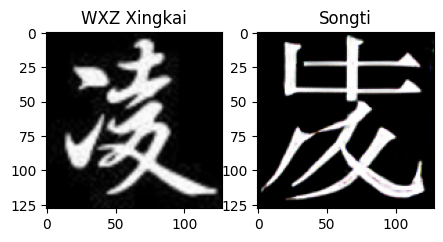

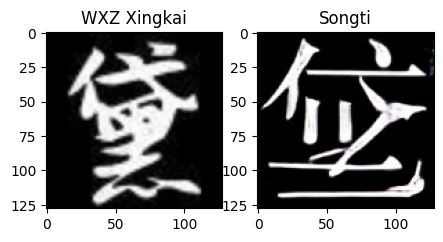

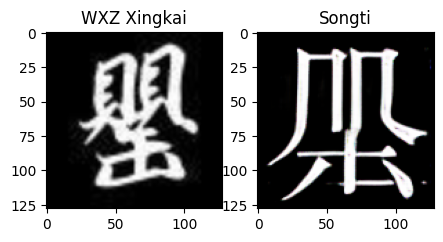

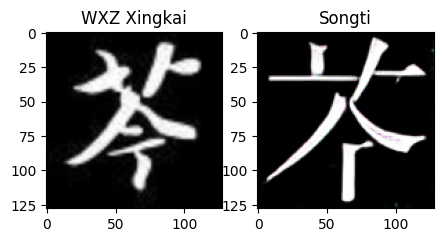

In [47]:
# test results

for i in random.sample(train_X, 5):
    plt.figure(figsize=(5, 10))
    plt.subplot(1, 2, 1)
    plt.title('Songti')
    plt.imshow(i[0].permute(1, 2, 0))
    
    plt.subplot(1, 2, 2)
    plt.title('WXZ Xingkai')
    plt.imshow(Gxy(i.type(dtype))[0].detach().cpu().permute(1, 2, 0))

for i in random.sample(train_Y, 5):
    plt.figure(figsize=(5, 10))
    plt.subplot(1, 2, 1)
    plt.title('WXZ Xingkai')
    plt.imshow(i[0].permute(1, 2, 0))
    
    plt.subplot(1, 2, 2)
    plt.title('Songti')
    plt.imshow(Gyx(i.type(dtype))[0].detach().cpu().permute(1, 2, 0))

In [36]:
# save the model
torch.save(Dx.state_dict(),'model_han/Dx.pth')
torch.save(Dy.state_dict(),'model_han/Dy.pth')
torch.save(Gxy.state_dict(),'model_han/Gxy.pth')
torch.save(Gyx.state_dict(),'model_han/Gyx.pth')
